In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# import shapely
# from shapely import wkt
sns.set(style='darkgrid')
% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

C:\Users\Michal_schudnij\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_warszawa = pd.read_csv("../datasets/preprocessed_data/df_warszawa_gwr.csv")
df_krakow = pd.read_csv("../datasets/preprocessed_data/df_krakow_gwr.csv")
df_poznan = pd.read_csv("../datasets/preprocessed_data/df_poznan_gwr.csv")

In [4]:
df = pd.concat([df_warszawa, df_krakow, df_poznan])

In [7]:
df = pd.read_csv("../datasets/preprocessed_data/df_gwr_after_transform.csv")

In [8]:
df = df.drop(columns = {'operator', 'buffer', 'buffer_index'})

In [9]:
df.columns.to_list()

['point_id',
 'center',
 'inpost_points',
 'poczta_points',
 'dhl_points',
 'ruch_points',
 'dpd_points',
 'ups_points',
 'fedex_points',
 'TOT',
 'TOT_0_14',
 'TOT_15_64',
 'TOT_65__',
 'TOT_MALE',
 'TOT_FEM',
 'MALE_0_14',
 'MALE_15_64',
 'MALE_65__',
 'FEM_0_14',
 'FEM_15_64',
 'FEM_65__',
 'FEM_RATIO',
 'buildings',
 'shops',
 'parks',
 'forests',
 'schools',
 'railways',
 'cycleways',
 'parkings',
 'crossings',
 'bus_stops',
 'shops_binary',
 'parks_binary',
 'TOTlog',
 'TOT_0_14log',
 'TOT_15_64log',
 'TOT_65__log',
 'TOT_MALElog',
 'TOT_FEMlog',
 'MALE_0_14log',
 'MALE_15_64log',
 'MALE_65__log',
 'FEM_0_14log',
 'FEM_15_64log',
 'FEM_65__log']

In [10]:
df.head()

,point_id,center,inpost_points,poczta_points,dhl_points,ruch_points,dpd_points,ups_points,fedex_points,TOT,...,TOT_15_64log,TOT_65__log,TOT_MALElog,TOT_FEMlog,MALE_0_14log,MALE_15_64log,MALE_65__log,FEM_0_14log,FEM_15_64log,FEM_65__log
0,18329,POINT (21.0303 52.3169),2,0.0,0.0,0.0,1.0,1.0,0.0,491.75,...,5.842384,3.499533,5.486248,5.531807,4.096010,5.112590,2.853593,4.066459,5.190732,2.824351
1,11784,POINT (20.99999 52.31708),1,1.0,3.0,0.0,1.0,0.0,0.0,199.50,...,4.940570,3.709907,4.536356,4.680741,2.472328,4.260565,2.591516,2.429218,4.242765,3.370738
2,9471,POINT (21.0302805409061 52.3174329976903),3,0.0,0.0,0.0,1.0,1.0,0.0,491.75,...,5.842384,3.499533,5.486248,5.531807,4.096010,5.112590,2.853593,4.066459,5.190732,2.824351
3,35458,POINT (21.03759 52.31755),2,0.0,0.0,0.0,0.0,1.0,0.0,491.75,...,5.842384,3.499533,5.486248,5.531807,4.096010,5.112590,2.853593,4.066459,5.190732,2.824351
4,11431,POINT (21.05028 52.31764),2,2.0,1.0,0.0,2.0,0.0,0.0,2178.75,...,7.320262,4.267597,6.947072,7.039529,5.735281,6.551937,3.468856,5.675383,6.698391,3.697591


In [86]:
# df_warszawa['center'][0][7:]

In [87]:
# df_warszawa['z'], df_warszawa['y'] = df_warszawa['center'][0].split('(')
# df_warszawa['lon'], df_warszawa['lat'] = df_warszawa['y'][0].split(' ')
# df_warszawa['xxx'], df_warszawa['yyyy'] = df_warszawa['lat'][0].split(')')

In [11]:
# df_warszawa = pd.read_csv("../datasets/preprocessed_data/df_warszawa_gwr_niepelny.csv")
df[['remove', 'long']] = df['center'].str.split('(', expand=True)
df[['long', 'lat']] = df['long'].str.split(' ', expand=True)
df[['lat', 'remove2']] = df['lat'].str.split(')', expand=True)
df = df.drop(columns = {'remove', 'remove2', 'point_id'})

In [12]:
df.head()

,center,inpost_points,poczta_points,dhl_points,ruch_points,dpd_points,ups_points,fedex_points,TOT,TOT_0_14,...,TOT_MALElog,TOT_FEMlog,MALE_0_14log,MALE_15_64log,MALE_65__log,FEM_0_14log,FEM_15_64log,FEM_65__log,long,lat
0,POINT (21.0303 52.3169),2,0.0,0.0,0.0,1.0,1.0,0.0,491.75,116.25,...,5.486248,5.531807,4.096010,5.112590,2.853593,4.066459,5.190732,2.824351,21.0303,52.3169
1,POINT (20.99999 52.31708),1,1.0,3.0,0.0,1.0,0.0,0.0,199.50,21.00,...,4.536356,4.680741,2.472328,4.260565,2.591516,2.429218,4.242765,3.370738,20.99999,52.31708
2,POINT (21.0302805409061 52.3174329976903),3,0.0,0.0,0.0,1.0,1.0,0.0,491.75,116.25,...,5.486248,5.531807,4.096010,5.112590,2.853593,4.066459,5.190732,2.824351,21.0302805409061,52.3174329976903
3,POINT (21.03759 52.31755),2,0.0,0.0,0.0,0.0,1.0,0.0,491.75,116.25,...,5.486248,5.531807,4.096010,5.112590,2.853593,4.066459,5.190732,2.824351,21.03759,52.31755
4,POINT (21.05028 52.31764),2,2.0,1.0,0.0,2.0,0.0,0.0,2178.75,599.00,...,6.947072,7.039529,5.735281,6.551937,3.468856,5.675383,6.698391,3.697591,21.05028,52.31764


In [13]:
import shapely
from shapely.geometry import Point
import shapely.wkt
df['geometry'] = df.apply(lambda x: shapely.wkt.loads(x['center']), axis=1)

In [14]:
df_geo = gpd.GeoDataFrame(df, geometry = 'geometry', crs = "epsg:4258")

In [15]:
import mgwr

In [16]:
import numpy as np
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

In [17]:
from mgwr.utils import compare_surfaces, truncate_colormap

c:\users\michal_schudnij\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


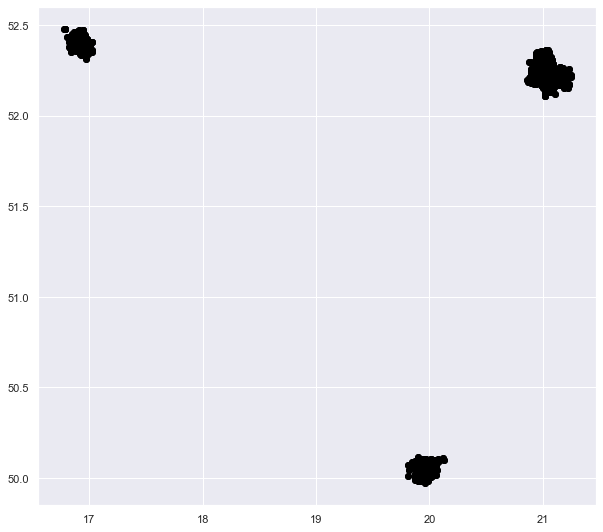

In [95]:
fig, ax = plt.subplots(figsize = (10, 10))
df_geo.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
df_geo.centroid.plot(ax = ax, c = 'black')
plt.show()

In [96]:
df_geo.head()

,center,inpost_points,poczta_points,dhl_points,ruch_points,dpd_points,ups_points,fedex_points,TOT,TOT_0_14,...,forests,schools,railways,cycleways,parkings,crossings,bus_stops,long,lat,geometry
0,POINT (21.0303 52.3169),2,0.0,0.0,0.0,1.0,1.0,0.0,491.75,116.25,...,2.0,3.0,0.0,0.0,4.0,12.0,0.0,21.0303,52.3169,POINT (21.03030 52.31690)
1,POINT (20.99999 52.31708),1,1.0,3.0,0.0,1.0,0.0,0.0,199.50,21.00,...,14.0,1.0,29.0,1.0,3.0,35.0,0.0,20.99999,52.31708,POINT (20.99999 52.31708)
2,POINT (21.0302805409061 52.3174329976903),3,0.0,0.0,0.0,1.0,1.0,0.0,491.75,116.25,...,2.0,2.0,0.0,0.0,4.0,11.0,0.0,21.0302805409061,52.3174329976903,POINT (21.03028 52.31743)
3,POINT (21.03759 52.31755),2,0.0,0.0,0.0,0.0,1.0,0.0,491.75,116.25,...,0.0,3.0,0.0,0.0,2.0,25.0,0.0,21.03759,52.31755,POINT (21.03759 52.31755)
4,POINT (21.05028 52.31764),2,2.0,1.0,0.0,2.0,0.0,0.0,2178.75,599.00,...,2.0,5.0,0.0,0.0,8.0,12.0,0.0,21.05028,52.31764,POINT (21.05028 52.31764)


In [18]:
df_geo['long'] = df_geo['long'].astype(float)

In [19]:
df_geo['lat'] = df_geo['lat'].astype(float)

In [20]:
df_geo.columns.to_list()

['center',
 'inpost_points',
 'poczta_points',
 'dhl_points',
 'ruch_points',
 'dpd_points',
 'ups_points',
 'fedex_points',
 'TOT',
 'TOT_0_14',
 'TOT_15_64',
 'TOT_65__',
 'TOT_MALE',
 'TOT_FEM',
 'MALE_0_14',
 'MALE_15_64',
 'MALE_65__',
 'FEM_0_14',
 'FEM_15_64',
 'FEM_65__',
 'FEM_RATIO',
 'buildings',
 'shops',
 'parks',
 'forests',
 'schools',
 'railways',
 'cycleways',
 'parkings',
 'crossings',
 'bus_stops',
 'shops_binary',
 'parks_binary',
 'TOTlog',
 'TOT_0_14log',
 'TOT_15_64log',
 'TOT_65__log',
 'TOT_MALElog',
 'TOT_FEMlog',
 'MALE_0_14log',
 'MALE_15_64log',
 'MALE_65__log',
 'FEM_0_14log',
 'FEM_15_64log',
 'FEM_65__log',
 'long',
 'lat',
 'geometry']

In [25]:
g_y = df_geo['inpost_points'].values.reshape((-1, 1))
g_X = df_geo[['poczta_points', 'dhl_points', 'ruch_points', 'dpd_points', 'ups_points', 'TOTlog','TOT_0_14log','TOT_15_64log','TOT_65__log','TOT_MALElog','TOT_FEMlog','MALE_0_14log','MALE_15_64log','MALE_65__log','FEM_0_14log','FEM_15_64log','FEM_65__log','FEM_RATIO', 'buildings','parks','forests','schools','railways','cycleways','parkings','crossings']].values
# wywalam shops/parks oraz wiekszosc demo 
u = df_geo['long']
v = df_geo['lat']
g_coords = list(zip(u, v))

In [26]:
# g_y = df_geo['inpost_points'].values.reshape((-1, 1))
# g_X = df_geo[['TOT','MALE_0_14','MALE_15_64','MALE_65__','FEM_RATIO']].values
# # wywalam shops/parks oraz wiekszosc demo 
# u = df_geo['long']
# v = df_geo['lat']
# g_coords = list(zip(u, v))

In [27]:
selector = Sel_BW(g_coords, g_y, g_X)

In [28]:
g_X

array([[  0.,   0.,   0., ...,   0.,   4.,  12.],
       [  1.,   3.,   0., ...,   1.,   3.,  35.],
       [  0.,   0.,   0., ...,   0.,   4.,  11.],
       ...,
       [ 15.,  12.,   2., ...,   6.,  93., 142.],
       [  3.,   3.,   0., ...,   0.,  34.,  57.],
       [  5.,   3.,   1., ...,  17.,  35.,  72.]])

In [29]:
bw = selector.search()

In [30]:
print(bw)

178.0


In [170]:
# bw = selector.search(search_method = 'interval',
# interval = 2,
# bw_min = 30,
# bw_max = 100)

In [31]:
print(bw)

178.0


In [32]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

178.0


In [33]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()
print(gwr_results.resid_ss)

1494.372770625138


In [34]:
# gwr_model = GWR(g_coords, g_y, g_X, 110)
# gwr_results = gwr_model.fit()
# print(gwr_results.resid_ss)

In [35]:
# fig, ax = plt.subplots(2, 3, figsize = (10, 8))
# bws = (x for x in range(25, 175, 25))

# for row in range(2):
#     for col in range(3):
#         bw = next(bws)
#         gwr_model = GWR(g_coords, g_y, g_X, bw)
#         gwr_results = gwr_model.fit()
#         georgia['rural'] = gwr_results.params[:, -1]
#         georgia.plot('rural', ax = ax[row, col])
#         ax[row,col].set_title('Bandwidth: ' + str(bw))
#         ax[row,col].get_xaxis().set_visible(False)
#         ax[row,col].get_yaxis().set_visible(False)
#         plt.savefig('explore')
#         plt.show()

In [36]:
from spglm.family import Poisson, Binomial

In [37]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

178.0


In [38]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()
print(gwr_results.aic)
print(gwr_results.aicc)
print(gwr_results.R2)

5366.961072039421
5708.818257445382
0.8270925193274468


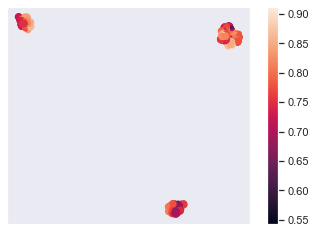

In [39]:
df_geo['R2'] = gwr_results.localR2
df_geo.plot('R2', legend = True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.savefig('local_R2')
plt.show()

In [40]:
#Visualizing hypothesis tests for significance of parameter estimates
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

178.0


In [41]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()

In [42]:
# 'poczta_points', 'dhl_points', 'ruch_points', 'dpd_points', 'ups_points', 'TOT','FEM_RATIO'

In [43]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                1623
Number of covariates:                                                    27

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           4504.228
Log-likelihood:                                                   -3131.268
AIC:                                                               6316.536
AICc:                                                              6319.555
BIC:                                                              -7293.455
R2:                                                                   0.479
Adj. R2:                                                              0.470

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [108]:
#default behavior using corrected alpha
filter_tc = gwr_results.filter_tvals()

In [109]:
#without correction using common alpha
filter_t = gwr_results.filter_tvals(alpha = 0.05)

In [110]:
df_warszawa['rural'] = gwr_results.params[:, 1]
df_warszawa['rural_t'] = filter_t[:, 1]
df_warszawa['rural_tc'] = filter_tc[:, 1]

AttributeError: 'Line2D' object has no property 'edgecolor'

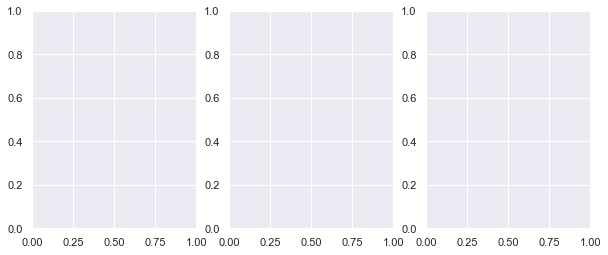

In [113]:
fig, ax = plt.subplots(1, 3, figsize = (10, 4))
df_warszawa.plot('rural', **{'edgecolor': 'black', 'alpha': .65, 'linewidth': .5}, ax = ax[0])
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title('Parameter estimates')

df_warszawa.plot('rural', **{'edgecolor': 'black', 'alpha': .65, 'linewidth': .5}, ax = ax[1])

df_warszawa[filter_t[:, 1] == 0].plot(color = 'grey', ax = ax[1], **{'edgecolor': 'black', 'linewidth': .5})
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title('Composite')

df_warszawa.plot('rural', **{'edgecolor': 'black', 'alpha': .65, 'linewidth': .5}, ax = ax[2])
df_warszawa[filter_tc[:, 1] == 0].plot(color = 'grey', ax = ax[2], **{'edgecolor': 'black', 'linewidth': .5})
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title('Composite with correction')

In [ ]:
#Visualizing hypothesis tests for significance of parameter estimates

#Manually set bandwidth to 50 and fit
gwr_model = GWR(g_coords, g_y, g_X, 50)
gwr_results = gwr_model.fit()

In [ ]:
#100 iterations
p_vals_100 = gwr_results.spatial_variability(gwr_selector, 100)
print(p_vals_100)

In [ ]:
#default is 1000 iterations
p_vals_1000 = gwr_results.spatial_variability(gwr_selector)
print(p_vals_1000)

In [ ]:
#2000 iterations
p_vals_2000 = gwr_results.spatial_variability(gwr_selector, 2000)
print(p_vals_2000)

In [ ]:
>>> gwr_selector = Sel_BW(g_coords, g_y, g_X)
>>> gwr_bw = gwr_selector.search()
>>> print(gwr_bw)
117.0
>>> gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
>>> gwr_results = gwr_model.fit()
>>> LCC, VIF, CN, VDP = gwr_results.local_collinearity()
>>> names = ['Foreign Born vs. African American',
'Foreign Born vs. Rural',
'African American vs. Rural']
>>> fig, ax = plt.subplots(1, 3, figsize = (12, 4))
>>> for col in range(3):
georgia['vif'] = LCC[:, col]
georgia.plot('vif', ax = ax[col], legend = True)
ax[col].set_title('LCC: ' + names[col])
ax[col].get_xaxis().set_visible(False)
ax[col].get_yaxis().set_visible(False)
>>> names = ['Foreign Born', 'African American', 'Rural']
>>> fig, ax = plt.subplots(1, 3, figsize = (12, 4))
>>> for col in range(3):
georgia['vif'] = VIF[:, col]
georgia.plot('vif', ax = ax[col], legend = True)
ax[col].set_title('VIF: ' + names[col])
ax[col].get_xaxis().set_visible(False)
ax[col].get_yaxis().set_visible(False)
>>> fig, ax = plt.subplots(1, 1, figsize = (4, 4))
>>> georgia['cn'] = CN
>>> georgia.plot('cn', legend = True, ax = ax)
>>> ax.set_title('Condition Number')
>>> ax.get_xaxis().set_visible(False)
>>> ax.get_yaxis().set_visible(False)
>>> names = ['Intercept', 'Foreign Born', 'African American', 'Rural']
>>> fig, ax = plt.subplots(1, 4, figsize = (16, 4))
>>> for col in range(4):
georgia['vdp'] = VDP[:, col]
georgia.plot('vdp', ax = ax[col], legend = True)
ax[col].set_title('VDP: ' + names[col])
ax[col].get_xaxis().set_visible(False)
ax[col].get_yaxis().set_visible(False)